In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
df = pd.read_csv('train.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1317087,40,No,Travel_Rarely,1398,Cardiology,2,4,Life Sciences,1,...,4,80,0,21,2,3,20,15,1,12
1,1548175,40,No,Travel_Rarely,1300,Maternity,24,2,Technical Degree,1,...,1,80,2,9,3,3,9,8,4,7
2,1215433,25,No,Travel_Rarely,622,Cardiology,13,1,Medical,1,...,3,80,0,7,1,3,7,4,0,6
3,1375351,33,No,Travel_Rarely,922,Maternity,1,5,Medical,1,...,3,80,1,10,2,3,6,1,0,5
4,1028734,39,No,Travel_Frequently,505,Maternity,2,4,Technical Degree,1,...,4,80,0,20,1,3,19,6,11,8


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1340 non-null   int64 
 1   Age                       1340 non-null   int64 
 2   Attrition                 1340 non-null   object
 3   BusinessTravel            1340 non-null   object
 4   DailyRate                 1340 non-null   int64 
 5   Department                1340 non-null   object
 6   DistanceFromHome          1340 non-null   int64 
 7   Education                 1340 non-null   int64 
 8   EducationField            1340 non-null   object
 9   EmployeeCount             1340 non-null   int64 
 10  EnvironmentSatisfaction   1340 non-null   int64 
 11  Gender                    1340 non-null   object
 12  HourlyRate                1340 non-null   int64 
 13  JobInvolvement            1340 non-null   int64 
 14  JobLevel                

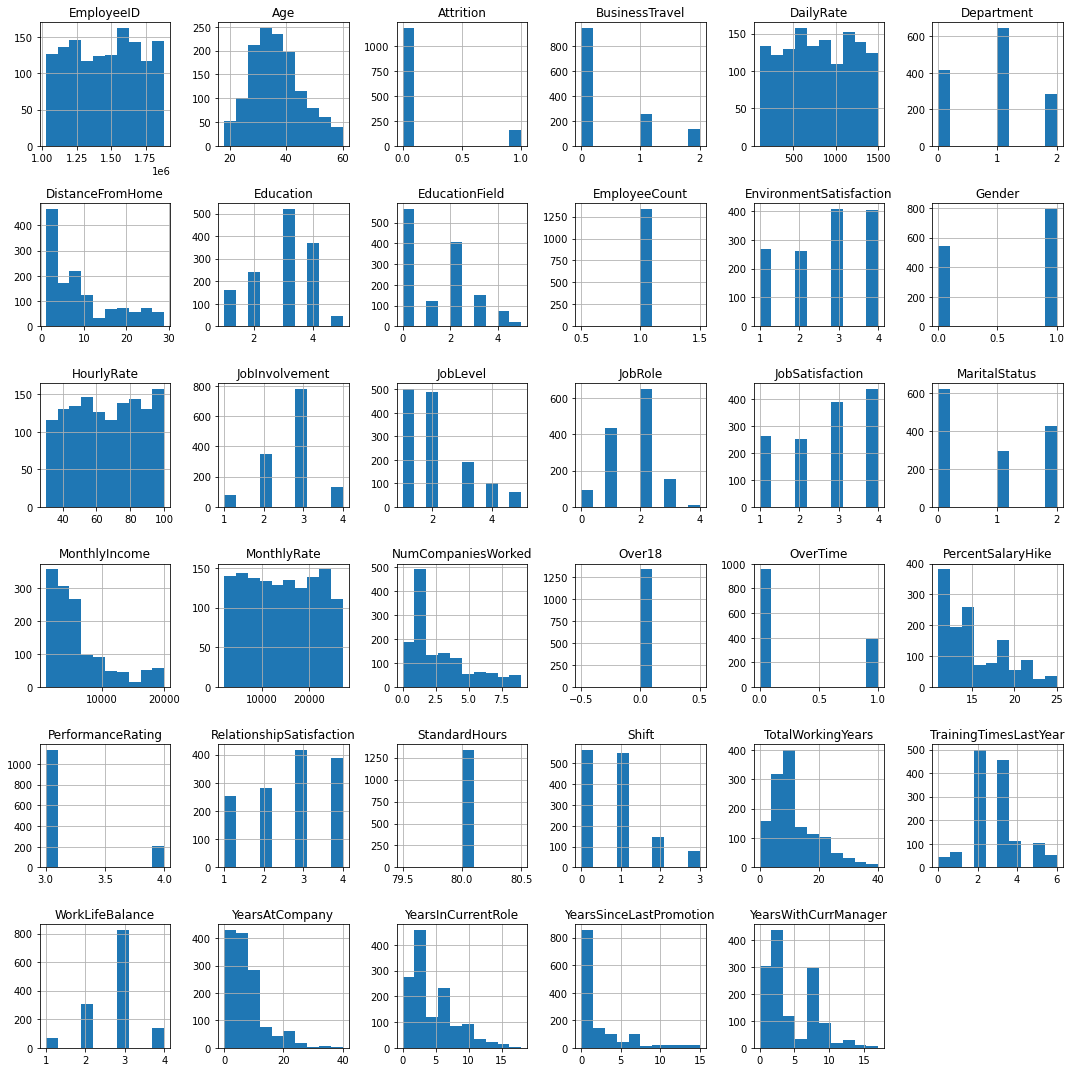

In [180]:
X = pd.read_csv('train.csv')

# Label encoding for categoricals
for colname in X.select_dtypes("O"):
    X[colname], _ = X[colname].factorize()
    
# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int
X.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

In [182]:
df.drop(['EmployeeCount','EmployeeID', 'StandardHours'],axis=1,inplace=True)
df.drop('Over18',axis=1,inplace=True)

df.replace({'JobRole':{'Admin': 'Administrative'}}, inplace=True)
df.replace({'Education':{1:'Below_college', 2:'College', 3:'Bachelor', 4:'Masters', 5:'Doctor'}}, inplace=True)
low_col = []
for i in df.columns:
    i = i.lower()
    low_col.append(i)
df.columns = low_col

df_dum = pd.get_dummies(df)



In [183]:
df_dum.drop(['gender_Female','overtime_No','attrition_No'],axis=1,inplace=True)
low_col = []
for i in df_dum.columns:
    i = i.lower()
    low_col.append(i)
df_dum.columns = low_col
df_dum.columns

Index(['age', 'dailyrate', 'distancefromhome', 'environmentsatisfaction',
       'hourlyrate', 'jobinvolvement', 'joblevel', 'jobsatisfaction',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'shift', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'attrition_yes',
       'businesstravel_non-travel', 'businesstravel_travel_frequently',
       'businesstravel_travel_rarely', 'department_cardiology',
       'department_maternity', 'department_neurology', 'education_bachelor',
       'education_below_college', 'education_college', 'education_doctor',
       'education_masters', 'educationfield_human resources',
       'educationfield_life sciences', 'educationfield_marketing',
       'educationfield_medical', 'educationfield_other',
       'educationfield_technical degree',

In [184]:
df_dum.shape

(1340, 49)

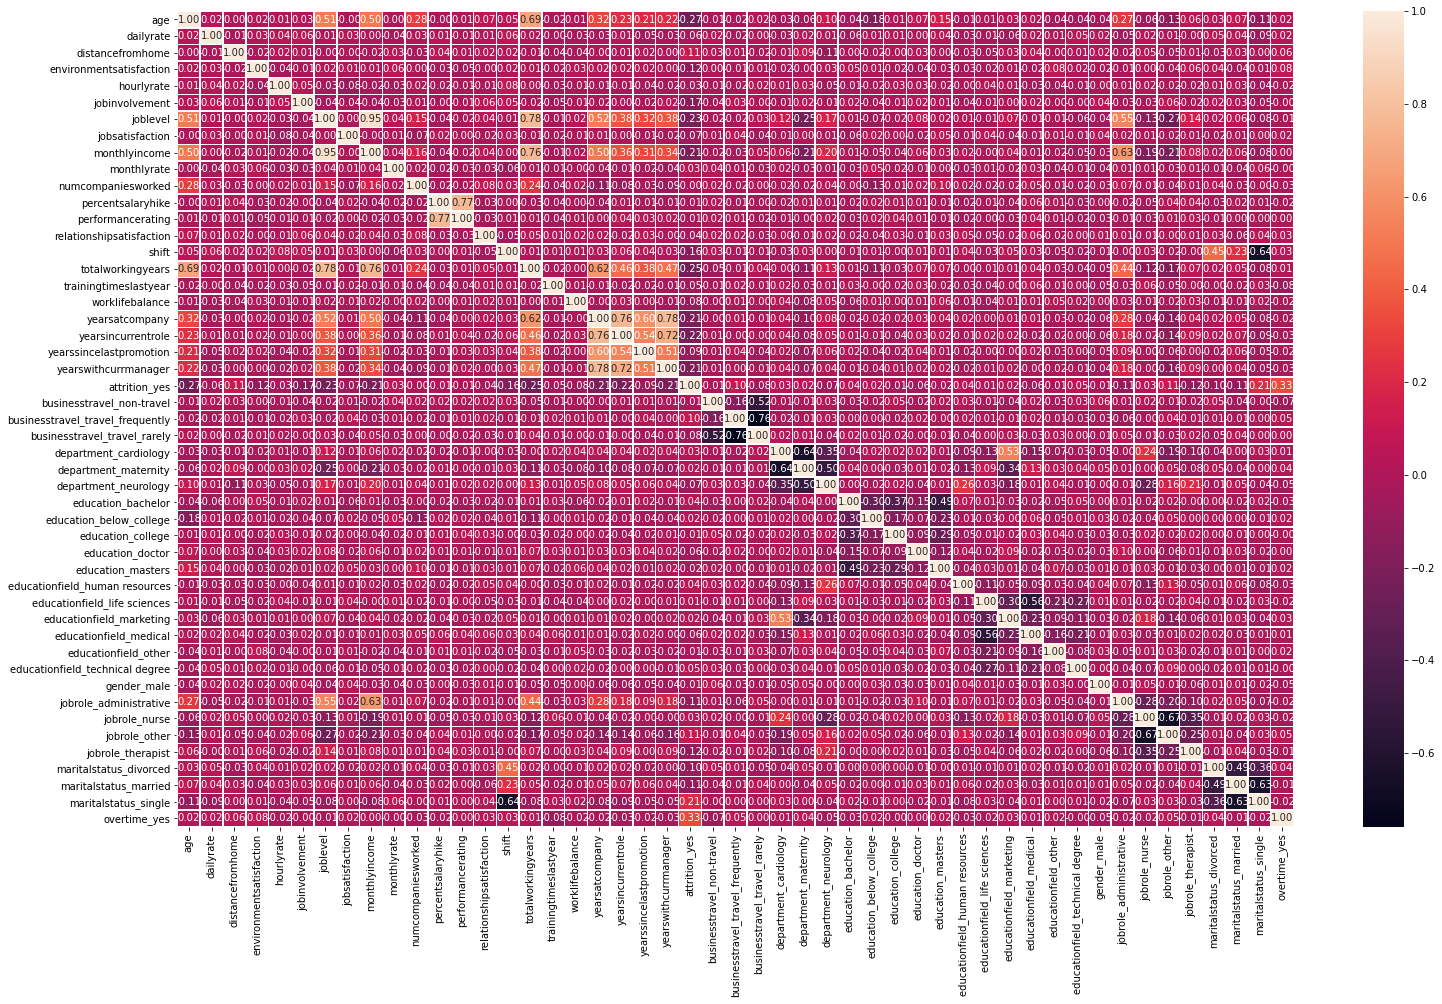

In [185]:

corr_matrix = df_dum.corr()
fig,ax=plt.subplots(figsize=(25,15))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [186]:
df.loc[df.attrition == 'Yes', 'attrition'] = 1
df.loc[df.attrition == 'No', 'attrition'] = 0

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


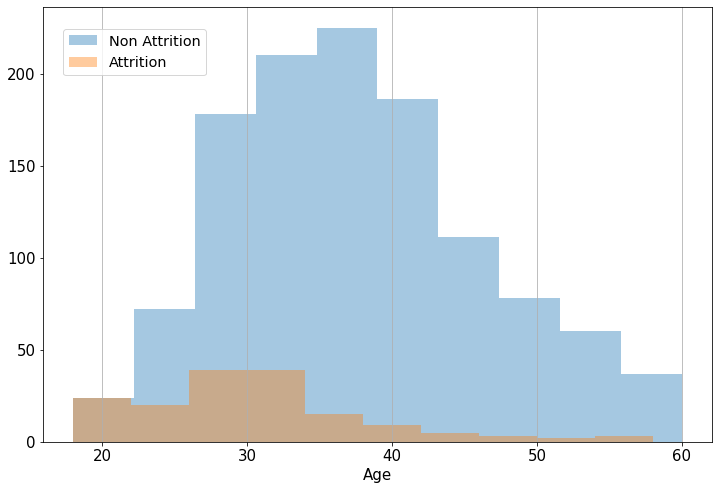

In [187]:
""" Plot the distribution of Age where attrition is true and false. """

plt.figure(figsize=(12,8))

""" Adjusting the bin size can alter the look of your graph, worth testing different sizes to see various plots. """
fig = sns.distplot(df[df['attrition'] == 0]['age'], label='Non Attrition', kde=0, bins=10)
sns.distplot(df[df['attrition'] == 1]['age'], label='Attrition', kde=0, bins=10)

#sns.despine(left=1)

""" Removes the vertical gridlines. """
fig.grid(axis='x')

plt.xlabel('Age',fontsize=15)
fig.yaxis.labelpad = 30
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.yaxis.labelpad = 35

""" Control the size and positioning of the legend. """
plt.legend(fontsize='x-large', bbox_to_anchor=(0.03, 0.95), loc=2, borderaxespad=0., frameon=1)
plt.show()

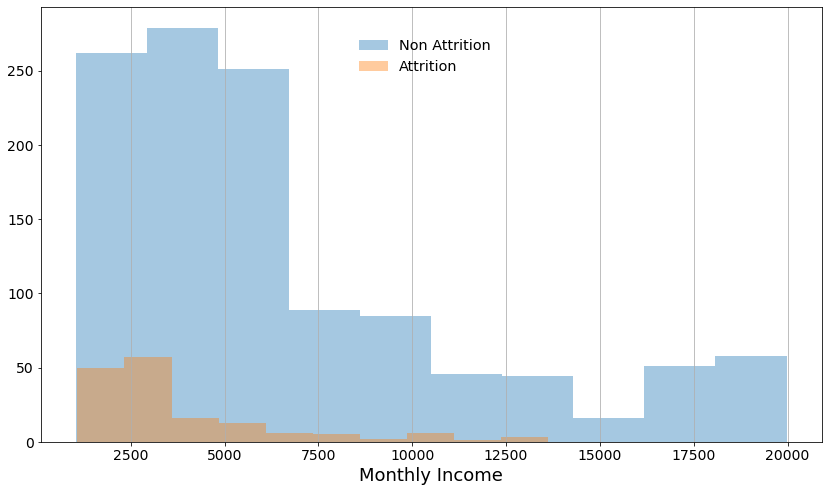

Average Monthly Income: 6433.381343283582
Average Monthly Income for Males: 6334.13567839196
Average Monthly Income for Females: 6578.601102941177


In [188]:
plt.figure(figsize=(14,8))
fig = sns.distplot(df[df['attrition'] == 0]['monthlyincome'], label='Non Attrition', kde=0, bins=10)
sns.distplot(df[df['attrition'] == 1]['monthlyincome'], label='Attrition', kde=0, bins=10)
fig.grid(axis='x')
plt.xlabel('Monthly Income',fontsize=18)
fig.yaxis.labelpad = 30
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.yaxis.labelpad = 35
plt.legend(fontsize='x-large', bbox_to_anchor=(0.4, 0.94), loc=2, borderaxespad=0., frameon=0)
plt.show()
print('Average Monthly Income:',df.monthlyincome.mean())
print('Average Monthly Income for Males:',df[df.gender == 'Male']['monthlyincome'].mean())
print('Average Monthly Income for Females:',df[df.gender == 'Female']['monthlyincome'].mean())


In [189]:
income = df.groupby(by='jobrole').mean().monthlyincome
inc = pd.DataFrame(income)
inc = inc.sort_values(by='monthlyincome')
inc

,monthlyincome
jobrole,
Other,5006.112903
Nurse,5519.843318
Therapist,7517.263158
Administrative,16621.708738


In [190]:
education = df.groupby(by='education').mean().monthlyincome
edu = pd.DataFrame(education)
edu = edu.sort_values(by='monthlyincome')
edu

,monthlyincome
education,
Below_college,5783.493827
College,6071.212500
Bachelor,6505.622605
Masters,6650.588076
Doctor,8015.148936


In [191]:
shift = df.groupby(by='shift').mean().monthlyincome
shi = pd.DataFrame(shift)
shi = shi.sort_values(by='monthlyincome')
shi

,monthlyincome
shift,
3,5781.687500
0,6197.030142
2,6242.476190
1,6822.271403


In [192]:
totalworkingyears = df.groupby(by='totalworkingyears').mean().monthlyincome
twy = pd.DataFrame(totalworkingyears)
twy = twy.sort_values(by='monthlyincome')


In [193]:
yearsincurrentrole = df.groupby(by='yearsincurrentrole').mean().monthlyincome
ycr = pd.DataFrame(yearsincurrentrole)
ycr = ycr.sort_values(by='monthlyincome')

In [194]:
yearsatcompany = df.groupby(by='yearsatcompany').mean().monthlyincome
ysc = pd.DataFrame(yearsatcompany)
ysc = ysc.sort_values(by='monthlyincome')

In [195]:
level = df.groupby(by='joblevel').mean().monthlyincome
lev = pd.DataFrame(level)
lev = lev.sort_values(by='monthlyincome')
lev

,monthlyincome
joblevel,
1,2771.292829
2,5472.848361
3,9783.963158
4,15473.131313
5,19147.524590


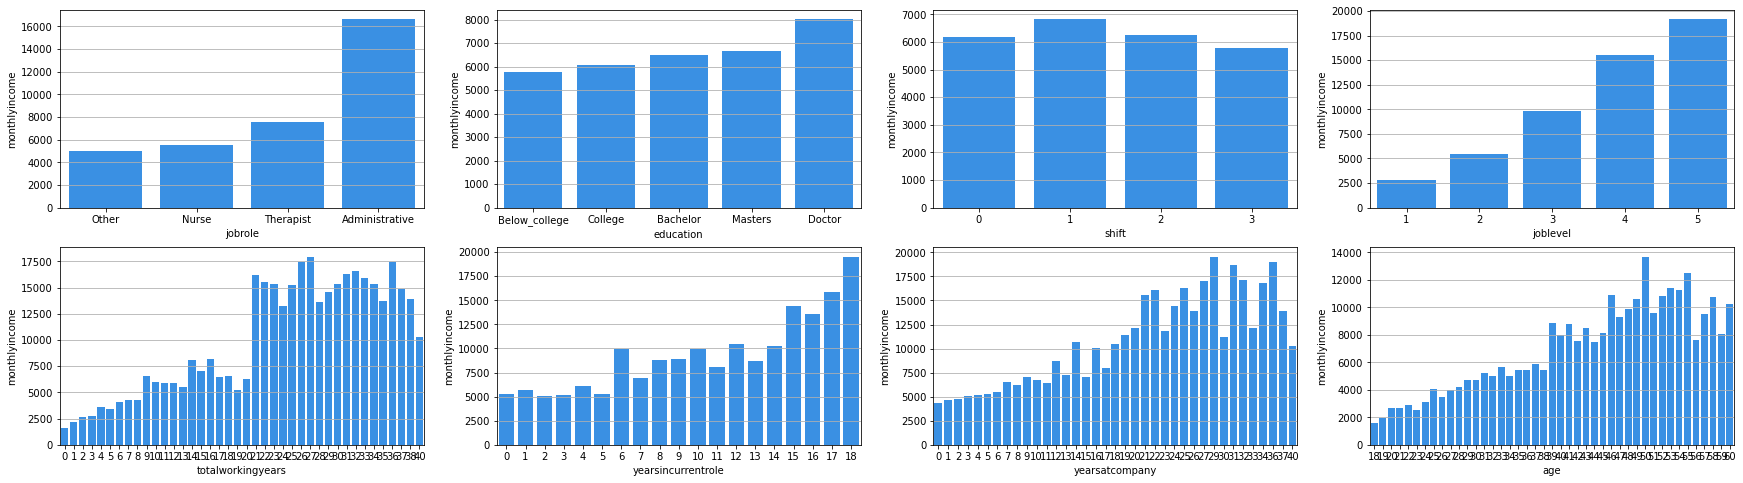

In [196]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30,8))
axes[0][0] = sns.barplot(y='monthlyincome', x=inc.index, data=inc, color='dodgerblue', ax = axes[0][0])
axes[0][1] = sns.barplot(y='monthlyincome', x=edu.index, data=edu, color='dodgerblue', ax = axes[0][1])
axes[0][2] = sns.barplot(y='monthlyincome', x=shi.index, data=shi, color='dodgerblue', ax = axes[0][2])
axes[0][3] = sns.barplot(y='monthlyincome', x=lev.index, data=lev, color='dodgerblue', ax = axes[0][3])
axes[1][0] = sns.barplot(y='monthlyincome', x=twy.index, data=twy, color='dodgerblue', ax = axes[1][0])
axes[1][1] = sns.barplot(y='monthlyincome', x=ycr.index, data=ycr, color='dodgerblue', ax = axes[1][1])
axes[1][2] = sns.barplot(y='monthlyincome', x=ysc.index, data=ysc, color='dodgerblue', ax = axes[1][2])
axes[1][3] = sns.barplot(y='monthlyincome', x=age.index, data=age, color='dodgerblue', ax = axes[1][3])

axes[0][0].grid(axis='y')
axes[0][1].grid(axis='y')
axes[0][2].grid(axis='y')
axes[0][3].grid(axis='y')
axes[1][0].grid(axis='y')
axes[1][1].grid(axis='y')
axes[1][2].grid(axis='y')
axes[1][3].grid(axis='y')
plt.show()


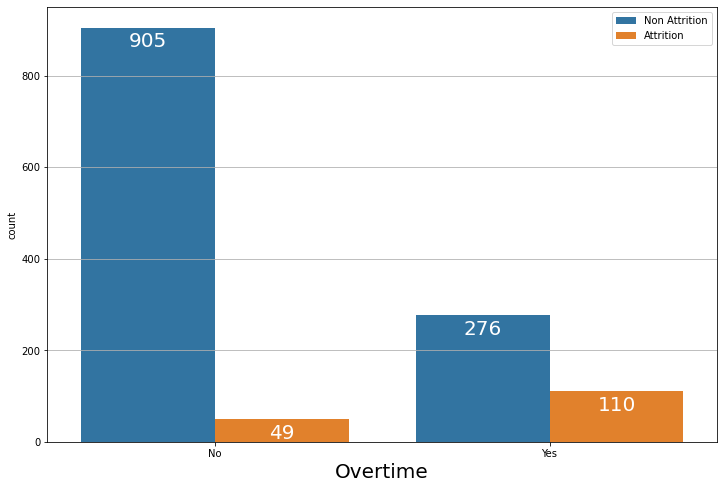

In [197]:
plt.figure(figsize=(12,8))
fig = sns.countplot(x='overtime', hue='attrition', data=df)
fig.set_xlabel('Overtime', fontsize=20)
fig.grid(axis='y')

for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-50), ha='center', va='bottom', fontsize=20, color='white')
plt.legend(labels =['Non Attrition','Attrition'])
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


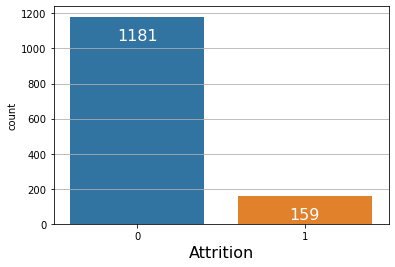

In [198]:
df.loc[df.attrition == 'Yes', 'attrition'] = 1
df.loc[df.attrition == 'No', 'attrition'] = 0

""" Set the figure size. """
plt.figure(figsize=(6,4))

fig = sns.countplot(df.attrition)

fig.grid(axis='y')

fig.set_xlabel('Attrition', fontsize=16)


for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}'.format(p.get_height()), (x.mean(), y-150), ha='center', va='bottom', fontsize=16, color='white')
plt.show()